In [33]:
from scipy import stats as ss

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import seaborn as sns




In [34]:
filepath = 'https://raw.githubusercontent.com/data-8/textbook/main/assets/data/baby.csv'

births = pd.read_csv(filepath)

A tabela de nascimentos contém as seguintes variáveis para os pares mãe-bebê:

* o peso do bebê ao nascer em onças;
* o número de dias gestacionais (o número de dias que a mãe esteve grávida);
* a idade da mãe em anos completos;
* a altura da mãe em polegadas;
* o peso da mãe em quilos;
* se a mãe fumou ou não durante a gravidez.




In [ ]:
births.head()

In [ ]:
smoking_and_birthweight = births[["Maternal Smoker", "Birth Weight"]]

In [ ]:
smoking_and_birthweight["Maternal Smoker"].value_counts()

In [ ]:
smoking_and_birthweight.groupby("Maternal Smoker")["Birth Weight"].hist(alpha=0.7,label="Maternal Smoker")
plt.legend()


In [ ]:
means_table = smoking_and_birthweight.groupby("Maternal Smoker").mean()
means_table

In [ ]:
mean_nonsmokers = means_table.loc[False]["Birth Weight"]
mean_smokers = means_table.loc[True]["Birth Weight"]

observed_difference = mean_smokers - mean_nonsmokers
observed_difference

In [ ]:
def difference_of_means(df, group_label):
    """Takes: data frame,
    column label that indicates the group to which the row belongs
    Returns: Difference of mean birth weights of the two groups"""
    
    reduced = df[["Birth Weight", group_label]]
    means_table = reduced.groupby(group_label).mean()
    mean_false = means_table.loc[False]["Birth Weight"]
    mean_true = means_table.loc[True]["Birth Weight"]    
    return mean_true - mean_false

In [ ]:
difference_of_means(births, 'Maternal Smoker')

In [ ]:
def shuffleMaternalSmoker():
    original_and_shuffled = smoking_and_birthweight.copy()
    original_and_shuffled["Shuffled Label"] = np.random.permutation(births['Maternal Smoker'].values)
    return original_and_shuffled


In [ ]:
original_and_shuffled = shuffleMaternalSmoker()
print(original_and_shuffled.head().to_markdown())


Birth Weight	Gestational Days	Maternal Age	Maternal Height	Maternal Pregnancy Weight	Maternal Smoker
0	120	284	27	62	100	False
1	113	282	33	64	135	False
2	128	279	28	64	115	True
3	108	282	23	67	125	True
4	136	286	25	62	93	False
Maternal Smoker
False              715
True               459
dtype: int64
<matplotlib.legend.Legend at 0x237eb89a940>

Birth Weight
Maternal Smoker	
False	123.085315
True	113.819172
-9.266142572024918
-9.266142572024918
False    715
True     459
Name: Maternal Smoker, dtype: int64
False    715
True     459
Name: Shuffled Label, dtype: int64
Birth Weight
Shuffled Label	
False	119.158042
True	119.936819
0.7787772140713258
-0.6485457897222631
(array([   2.,   31.,  169.,  631., 1249., 1541.,  995.,  322.,   48.,
          12.]),
 array([-4.60498499, -3.72605451, -2.84712403, -1.96819355, -1.08926307,
        -0.21033259,  0.66859789,  1.54752838,  2.42645886,  3.30538934,
         4.18431982]),
 <BarContainer object of 10 artists>)

0.0
<matplotlib.legend.Legend at 0x237ec2c67f0>

<matplotlib.legend.Legend at 0x237ec31bfa0>


-0.8076725017901509
Maternal Age
Maternal Smoker	
False	27.544056
True	26.736383
-0.024254612489905014
<matplotlib.lines.Line2D at 0x237ec915eb0>

|    | Maternal Smoker   |   Birth Weight | Shuffled Label   |
|---:|:------------------|---------------:|:-----------------|
|  0 | False             |            120 | False            |
|  1 | False             |            113 | False            |
|  2 | True              |            128 | True             |
|  3 | True              |            108 | False            |
|  4 | False             |            136 | True             |

In [ ]:
original_and_shuffled = shuffleMaternalSmoker()
print(original_and_shuffled.head().to_markdown())

|    | Maternal Smoker   |   Birth Weight | Shuffled Label   |
|---:|:------------------|---------------:|:-----------------|
|  0 | False             |            120 | True             |
|  1 | False             |            113 | False            |
|  2 | True              |            128 | False            |
|  3 | True              |            108 | False            |
|  4 | False             |            136 | True             |

In [ ]:
original_and_shuffled = shuffleMaternalSmoker()
print(original_and_shuffled.head().to_markdown())

|    | Maternal Smoker   |   Birth Weight | Shuffled Label   |
|---:|:------------------|---------------:|:-----------------|
|  0 | False             |            120 | False            |
|  1 | False             |            113 | True             |
|  2 | True              |            128 | False            |
|  3 | True              |            108 | True             |
|  4 | False             |            136 | False            |

In [ ]:
original_and_shuffled["Maternal Smoker"].value_counts()

In [ ]:
original_and_shuffled["Shuffled Label"].value_counts()

In [ ]:
original_and_shuffled[["Shuffled Label","Birth Weight"]].groupby("Shuffled Label").mean()

In [ ]:
difference_of_means(original_and_shuffled, 'Shuffled Label')

In [ ]:
def one_simulated_difference_of_means():
    """Returns: Difference between mean birthweights
    of babies of smokers and non-smokers after shuffling labels"""
    
    original_and_shuffled = smoking_and_birthweight.copy()
    original_and_shuffled["Shuffled Label"] = np.random.permutation(births['Maternal Smoker'].values)
    
    return difference_of_means(original_and_shuffled, 'Shuffled Label')  

In [ ]:
one_simulated_difference_of_means()

In [ ]:
differences = []

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    differences.append(new_difference)   

In [ ]:
plt.hist(differences)

In [ ]:
empirical_p = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_p

## Outro teste de permutação

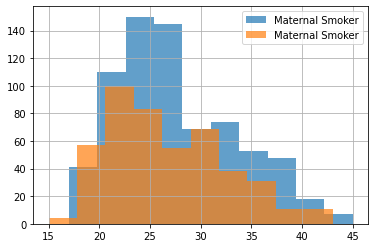

In [35]:
smoking_and_age = births[["Maternal Smoker", "Maternal Age"]]
smoking_and_age.groupby("Maternal Smoker")["Maternal Age"].hist(alpha=0.7,label="Maternal Smoker")
plt.legend()

Colocando `density=True` como parâmetro da função `hist`.

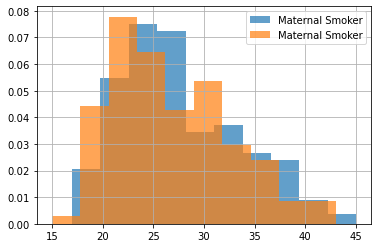

In [36]:
smoking_and_age.groupby("Maternal Smoker")["Maternal Age"].hist(density=True, alpha=0.7,label="Maternal Smoker")
plt.legend()

In [ ]:
means_table = smoking_and_age.groupby("Maternal Smoker").mean()
means_table

In [ ]:
mean_nonsmokers = means_table.loc[False]["Maternal Age"]
mean_smokers = means_table.loc[True]["Maternal Age"]

observed_difference = mean_smokers - mean_nonsmokers
observed_difference

In [ ]:
def difference_of_means(df, group_label):
    """Takes: data frame,
    column label that indicates the group to which the row belongs
    Returns: Difference of mean birth weights of the two groups"""
    
    reduced = df[["Maternal Age", group_label]]
    means_table = reduced.groupby(group_label).mean()
    mean_false = means_table.loc[False]["Maternal Age"]
    mean_true = means_table.loc[True]["Maternal Age"]    
    return mean_true - mean_false

In [ ]:
def one_simulated_difference_of_means():
    """Returns: Difference between mean maternal ages
    of babies of smokers and non-smokers after shuffling labels"""
    
    original_and_shuffled = smoking_and_age.copy()
    original_and_shuffled["Shuffled Label"] = np.random.permutation(births['Maternal Smoker'].values)
    
    return difference_of_means(original_and_shuffled, 'Shuffled Label')  

In [ ]:
one_simulated_difference_of_means()

In [ ]:
age_differences = []

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    age_differences.append(new_difference)

In [ ]:
plt.hist(age_differences)
plt.axvline(observed_difference, c='r')